# MODELING

Import thư viện và dữ liệu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Notebook customizations
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_colwidth = -1
import warnings

data = pd.read_csv('https://raw.githubusercontent.com/nchn471/PE1/main/HousePrice.csv')

In [ ]:
#Drop những cột dữ liệu không cần thiết dùng trong mô hình
data.drop(['datetime','address','district','city'],axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6732 entries, 0 to 6731
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   6732 non-null   float64
 1   acreage                 6732 non-null   float64
 2   bedrooms                6732 non-null   float64
 3   wc                      6732 non-null   float64
 4   floors                  6732 non-null   float64
 5   property age            6732 non-null   int64  
 6   latitude                6732 non-null   float64
 7   longitude               6732 non-null   float64
 8   hospital                6732 non-null   bool   
 9   supermarket             6732 non-null   bool   
 10  school                  6732 non-null   bool   
 11  park                    6732 non-null   bool   
 12  hospital_distance       6732 non-null   float64
 13  supermarket_distance    6732 non-null   float64
 14  school_distance         6732 non-null   

Splitting the Dataset: với các bài toán học máy có giám sát, chúng ta cần tập dữ liệu huấn luyện để huấn luyện mô hình của mình và tập dữ liệu thử nghiệm để đánh giá mô hình. Vì vậy, chúng tôi sẽ chia ngẫu nhiên tập dữ liệu của mình thành hai phần, một phần để đào tạo và phần còn lại để thử nghiệm

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('price',axis = 1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=3)

Các thuật toán học máy được sử dụng cho bài toán dự đoán giá nhà bao gồm Ridge Regression, Random Forest và Gradient Boosting. Dưới đây là lí do tại sao chúng được sử dụng:

* Ridge Regression: Đây là các thuật toán học máy cơ bản và phổ biến trong việc dự đoán giá nhà. Chúng được sử dụng để tìm mối quan hệ tuyến tính giữa biến đầu vào và biến mục tiêu. Linear Regression tạo ra một mô hình tuyến tính đơn giản, và Ridge Regression giúp giải quyết vấn đề overfitting và giúp cải thiện chất lượng dự đoán.

* Random Forest: Random Forest được tạo ra bằng cách kết hợp nhiều cây quyết định, mỗi cây được xây dựng trên một tập con của các đặc trưng và mẫu dữ liệu, để giảm thiểu overfitting và cải thiện chất lượng dự đoán.

* Gradient Boosting: Gradient Boosting là một thuật toán học máy mạnh mẽ và phổ biến được sử dụng để tăng cường các mô hình dự đoán. Nó kết hợp nhiều cây quyết định yếu thành một mô hình mạnh, bằng cách tập trung vào các trường hợp dữ liệu bị sai lệch. Gradient Boosting có thể cải thiện chất lượng dự đoán và độ chính xác của mô hình, nhưng yêu cầu thời gian huấn luyện và tính toán cao hơn so với các thuật toán khác.

###**Mô hình Gradient Boosting**

Sử dụng thư viện XGBoost, trong đó clf.best_params_ là một từ điển (dictionary) chứa các tham số tốt nhất được tìm thấy bằng kỹ thuật tìm siêu tham số (hyperparameter tuning) như tối ưu hóa hàm mất mát (objective function), số lượng cây quyết định (n_estimators), độ sâu tối đa của cây (max_depth), tỷ lệ học (learning rate),...

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

parameter_space = \
    {
        "max_depth": [4, 5, 6],
        "learning_rate": [0.005, 0.009, 0.01],
        "n_estimators": [700, 1000, 2500],
        "booster": ["gbtree",],
        "gamma": [7, 25, 100],
        "subsample": [0.3, 0.6],
        "colsample_bytree": [0.5, 0.7],
        "colsample_bylevel": [0.5, 0.7,],
        "reg_alpha": [1, 10, 33],
        "reg_lambda": [1, 3, 10],
    }

clf = RandomizedSearchCV(XGBRegressor(random_state=3), parameter_space, cv=3, n_jobs=4, scoring="neg_mean_absolute_error", random_state=3, n_iter=10)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'subsample': 0.6, 'reg_lambda': 3, 'reg_alpha': 10, 'n_estimators': 2500, 'max_depth': 6, 'learning_rate': 0.005, 'gamma': 7, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.7, 'booster': 'gbtree'}


In [ ]:
# Khởi tạo mô hình XGBRegressor với các tham số tốt nhất
xgb_model = XGBRegressor(**clf.best_params_)

In [ ]:
# Huấn luyện mô hình trên tập huấn luyện
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=0.7, colsample_bynode=None, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=7, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.005, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=2500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred_XG = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, y_pred_XG)
print("XGBoost MAE =", xgb_mae)

XGBoost MAE = 0.3122321736902129


Kết quả "XGBoost MAE = 0.3122321736902129" cho biết giá trị trung bình của độ lỗi tuyệt đối giữa giá trị dự đoán và giá trị thực tế trên tập kiểm tra của mô hình XGBoost là 0.3122321736902129.

Giá trị này cho thấy mô hình XGBoost dự đoán khá chính xác giá trị của biến mục tiêu trên tập kiểm tra, với độ lỗi trung bình chỉ khoảng 0.31.

Biểu đồ thể hiện mối quan hệ tuyến tính giữa giá trị thực tế và giá trị dự đoán của mô hình

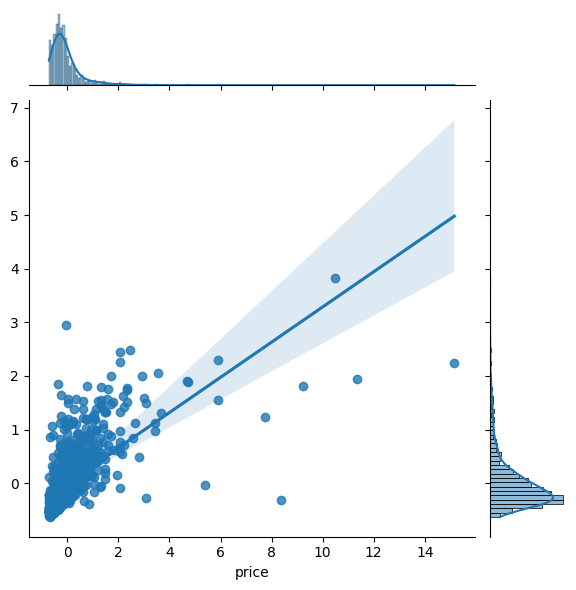

In [ ]:
sns.jointplot(x=y_test, y=y_pred_XG, kind='reg')

<Axes: xlabel='price', ylabel='Density'>

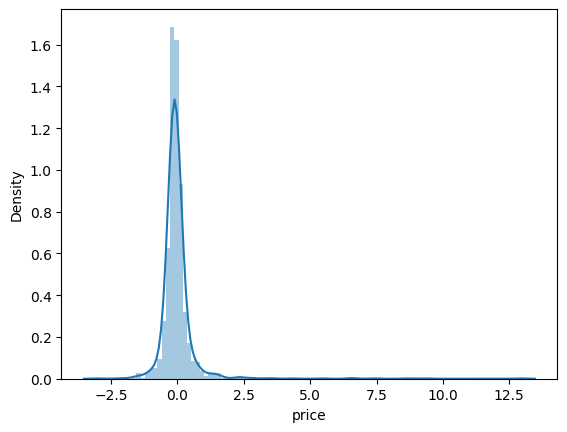

In [ ]:
sns.distplot((y_test-y_pred_XG), bins=100)


Ta thấy càng vê đỉnh đồ thị thì y_test và y_pred càng càng cách xa nhau, cho thấy dữ liệu càng lớn mô hình hoạt động không tốt

Tính toán các độ đo để đánh giá chất lượng mô hình dự đoán giá nhà trên tập kiểm tra

In [ ]:
from sklearn import metrics
MAE_XG = metrics.mean_absolute_error(y_test, y_pred_XG)
MSE_XG = metrics.mean_squared_error(y_test, y_pred_XG)
RMSE_XG = np.sqrt(metrics.mean_squared_error(y_test, y_pred_XG))
VS_XG = metrics.explained_variance_score(y_test,y_pred_XG)
print('Mean Absolute Error: {:.2f}'.format(MAE_XG))
print('Mean Squared Error:{:.2f}'.format(MSE_XG))
print('Root Mean Squared Error:{:.2f}'.format(RMSE_XG))
print('Variance score is: {:.2f}'.format(VS_XG))

Mean Absolute Error: 0.31
Mean Squared Error:0.58
Root Mean Squared Error:0.76
Variance score is: 0.40


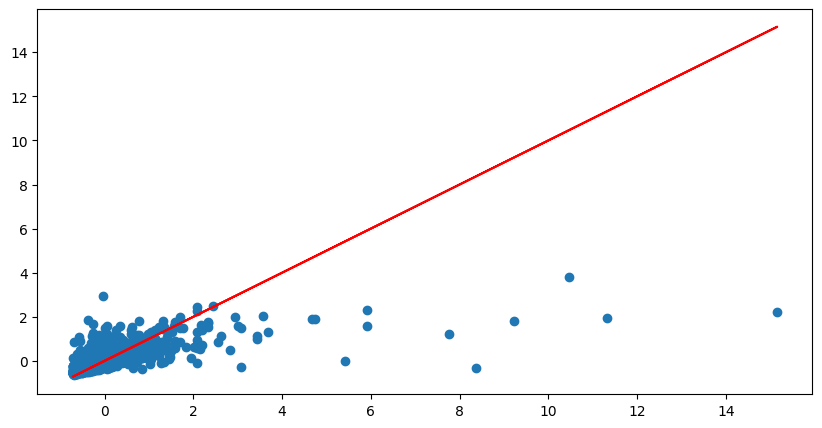

In [ ]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred_XG)
# Perfect predictions
plt.plot(y_test,y_test,'r')

Biểu đồ scatter plot này giúp hình dung rõ hơn sự khớp giữa giá trị thực tế và giá trị dự đoán của mô hình trên tập kiểm tra.Từ giá trị 0->4 các điểm trên biểu đồ nằm gần đường thẳng màu đỏ, tức là giá trị dự đoán y_pred gần bằng giá trị thực tế y_test. Điều này cho thấy mô hình học máy đã dự đoán khá chính xác giá trị của biến mục tiêu trên tập kiểm tra.

Nhưng từ giá trị 4 trở đi các điểm trên biểu đồ nằm xa đường thẳng màu đỏ, tức là giá trị dự đoán y_pred khác với giá trị thực tế y_test. Điều này cho thấy mô hình học máy không dự đoán chính xác giá trị của biến mục tiêu trên tập kiểm tra và cần được cải thiện.

### **Mô hình Ridge Regression**
Cách xây dựng tương tự như mô hình trên

Một lưới tham số (parameter grid) được định nghĩa trong biến parameter_space để tìm kiếm các giá trị tối ưu cho các tham số của mô hình, bao gồm alpha, fit_intercept, và solver.

Sau đó, hàm GridSearchCV() được sử dụng để tìm kiếm các giá trị tối ưu cho các tham số của mô hình dựa trên một lưới tham số đã định nghĩa. Hàm này sử dụng phương pháp tìm kiếm lưới (grid search) để tìm kiếm các giá trị tối ưu cho mô hình.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

parameter_space = {
    "alpha": [1, 10, 100, 290, 500],
    "fit_intercept": [True, False],
    "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}

clf = GridSearchCV(Ridge(random_state=3), parameter_space, n_jobs=4,
                   cv=3, scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'alpha': 500, 'fit_intercept': True, 'solver': 'sparse_cg'}


In [ ]:
ridge_model = Ridge(random_state=3, **clf.best_params_)
ridge_model.fit(X_train, y_train);

In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred_RR = ridge_model.predict(X_test)
ridge_mae = mean_absolute_error(y_test, y_pred_RR)
print("Ridge MAE =", ridge_mae)

Ridge MAE = 0.38605835897753693


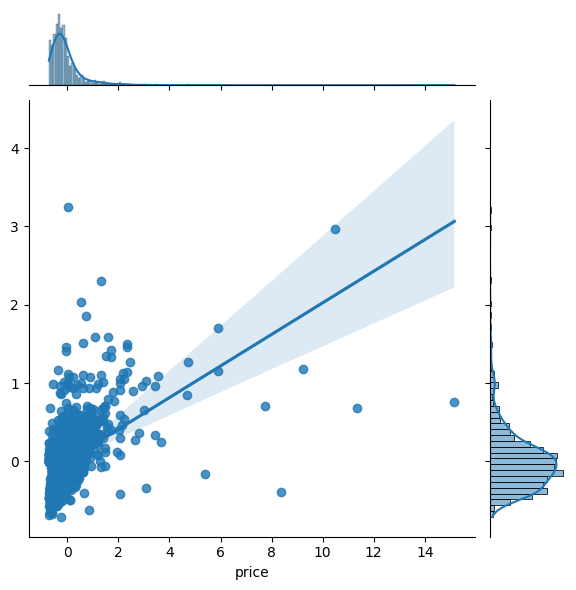

In [ ]:
sns.jointplot(x=y_test, y=y_pred_RR, kind='reg')

In [ ]:
#Tính toán các độ đo để đánh giá chất lượng mô hình dự đoán giá nhà trên tập kiểm tra
from sklearn import metrics
MAE_RR=metrics.mean_absolute_error(y_test, y_pred_RR)
MSE_RR=metrics.mean_squared_error(y_test, y_pred_RR)
RMSE_RR=np.sqrt(metrics.mean_squared_error(y_test, y_pred_RR))
VS_RR=metrics.explained_variance_score(y_test,y_pred_RR)
print('Mean Absolute Error: {:.2f}'.format(MAE_RR))
print('Mean Squared Error:{:.2f}'.format(MSE_RR))
print('Root Mean Squared Error:{:.2f}'.format(RMSE_RR))
print('Variance score is: {:.2f}'.format(VS_RR))

Mean Absolute Error: 0.39
Mean Squared Error:0.73
Root Mean Squared Error:0.86
Variance score is: 0.24


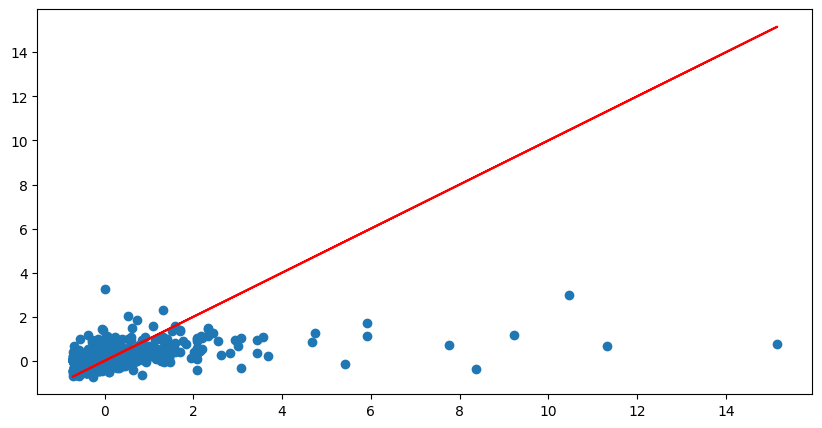

In [ ]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred_RR)
# Perfect predictions
plt.plot(y_test,y_test,'r')

### **Mô hình Random Forest**

Một lưới tham số (parameter grid) được định nghĩa trong biến parameter_space để tìm kiếm các giá trị tối ưu cho các tham số của mô hình, bao gồm n_estimators, criterion, max_depth, min_samples_split, min_samples_leaf, max_features, và bootstrap.

Sau đó, hàm RandomizedSearchCV() được sử dụng để tìm kiếm các giá trị tối ưu cho các tham số của mô hình dựa trên một phân phối ngẫu nhiên trong lưới tham số đã định nghĩa. Hàm này sử dụng phương pháp tìm kiếm ngẫu nhiên (random search) để tìm kiếm các giá trị tối ưu cho mô hình.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

parameter_space = \
    {
        "n_estimators": [10, 100, 300, 600],
        "criterion": ["friedman_mse", "absolute_error", "poisson", "squared_error"],
        "max_depth": [7, 50, 254],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 5],
        "max_features": [19, 100, X_train.shape[1]],
        "bootstrap": [True, False],
    }

clf = RandomizedSearchCV(RandomForestRegressor(random_state=3),
                         parameter_space, cv=3, n_jobs=4,
                         scoring="neg_mean_absolute_error",
                         n_iter=10, random_state=3)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 100, 'max_depth': 254, 'criterion': 'absolute_error', 'bootstrap': True}


In [ ]:
# Khởi tạo mô hình RandomForestRegressor với các tham số tốt nhất
rf_model = RandomForestRegressor(**clf.best_params_)


In [ ]:
# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=254,
                      max_features=100, n_estimators=10)

In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred_RF = rf_model.predict(X_test)
randomforest_mae = mean_absolute_error(y_test, y_pred_RF)
print("Ridge MAE =", randomforest_mae)

Ridge MAE = 0.3063398081004254


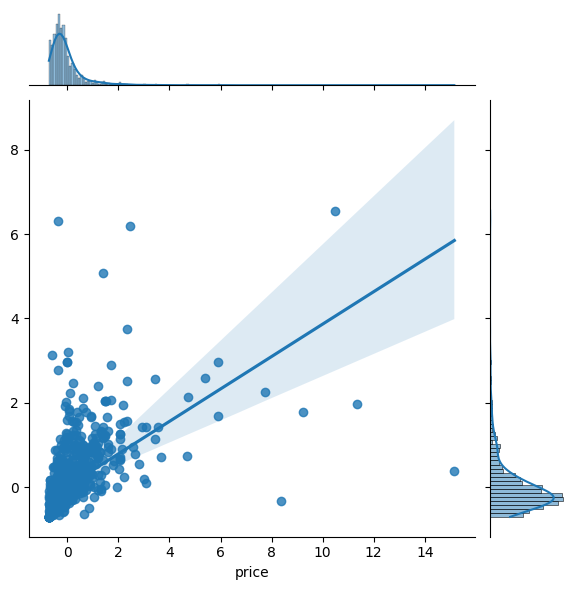

In [ ]:
sns.jointplot(x=y_test, y=y_pred_RF, kind='reg')

<Axes: xlabel='price', ylabel='Density'>

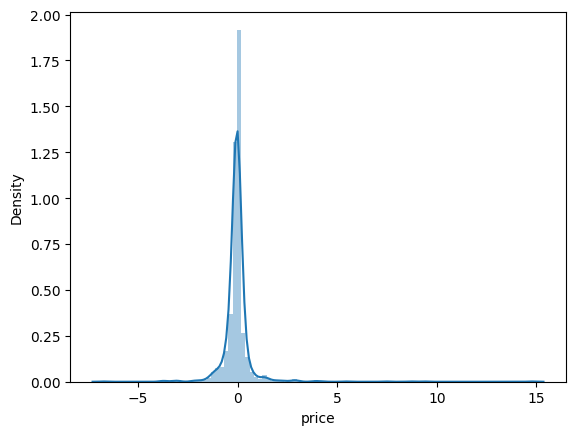

In [ ]:
sns.distplot((y_test-y_pred_RF), bins=100)


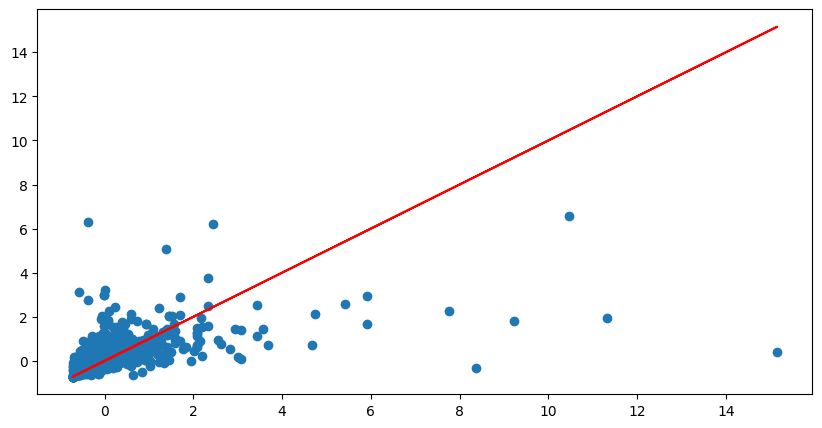

In [ ]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred_RF)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [ ]:
from sklearn import metrics
MAE_RF=metrics.mean_absolute_error(y_test, y_pred_RF)
MSE_RF=metrics.mean_squared_error(y_test, y_pred_RF)
RMSE_RF=np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF))
VS_RF=metrics.explained_variance_score(y_test,y_pred_RF)
print('Mean Absolute Error: {:.2f}'.format(MAE_RF))
print('Mean Squared Error:{:.2f}'.format(MSE_RF))
print('Root Mean Squared Error:{:.2f}'.format(RMSE_RF))
print('Variance score is: {:.2f}'.format(VS_RF))

Mean Absolute Error: 0.31
Mean Squared Error:0.68
Root Mean Squared Error:0.83
Variance score is: 0.30


### **Evaluation**

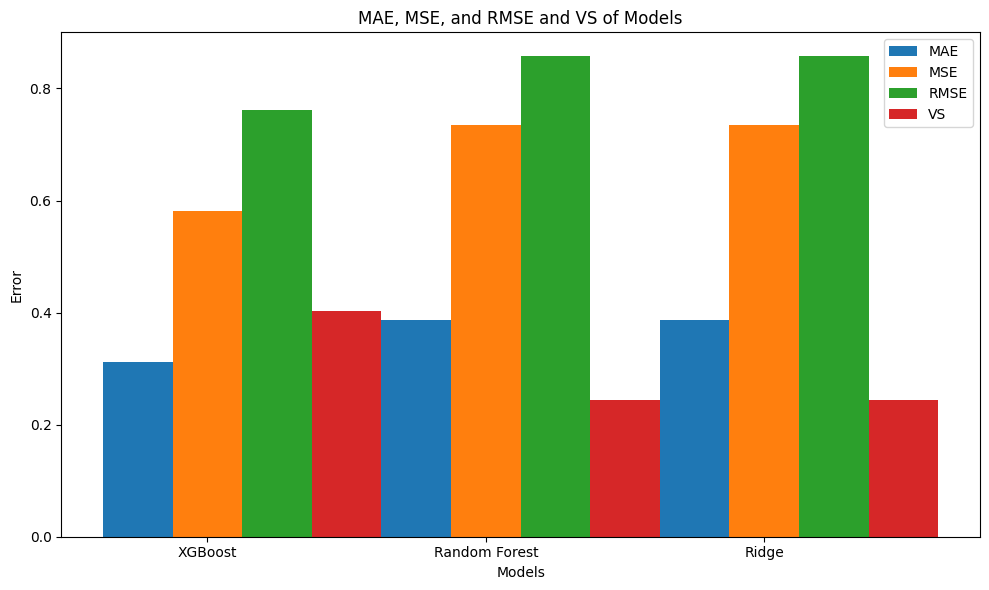

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Giá trị MAE, MSE và RMSE cho các mô hình (ví dụ)
models = ['XGBoost', 'Random Forest', 'Ridge']
mae = [MAE_XG,MAE_RF,MAE_RR]
mse = [MSE_XG,MSE_RF,MSE_RR]
rmse = [RMSE_XG,RMSE_RF,RMSE_RR]
vs = [VS_XG,VS_RF,VS_RR]

# Định dạng biểu đồ
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.25

# Vẽ các cột cho MAE, MSE và RMSE
plt.bar(x - width, mae, width, label='MAE')
plt.bar(x, mse, width, label='MSE')
plt.bar(x + width, rmse, width, label='RMSE')
plt.bar(x + 2*width, vs, width, label='VS')

# Cài đặt các thông số trục x và y
plt.xlabel('Models')
plt.ylabel('Error')
plt.xticks(x, models)
plt.title('MAE, MSE, and RMSE and VS of Models')
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()



- Mean Absolute Error (MAE): độ lỗi tuyệt đối trung bình giữa giá trị dự đoán và giá trị thực tế trên tập kiểm tra. Giá trị MAE càng nhỏ thì mô hình dự đoán càng chính xác. Đơn vị của MAE là đơn vị của biến mục tiêu.
- Mean Squared Error (MSE): độ lỗi bình phương trung bình giữa giá trị dự đoán và giá trị thực tế trên tập kiểm tra. Giá trị MSE càng nhỏ thì mô hình dự đoán càng chính xác. Đơn vị của MSE là đơn vị bình phương của biến mục tiêu.
- Root Mean Squared Error (RMSE): căn bậc hai của MSE. Giá trị RMSE càng nhỏ thì mô hình dự đoán càng chính xác. Đơn vị của RMSE là đơn vị của biến mục tiêu.
- Variance score (VS): hệ số xác định giải thích, biểu thị độ giải thích của mô hình đối với biến mục tiêu. Giá trị VS càng gần 1 thì mô hình càng tốt trong việc giải thích sự biến động của biến mục tiêu. Nếu VS bằng 1 thì mô hình hoàn hảo.

Các giá trị càng nhỏ cho MAE, MSE và RMSE và càng gần 1 cho VS thì mô hình dự đoán càng chính xác.

Dựa vào biểu đồ vừa vẽ ta thấy mô hình Gradiant Boosting là tốt nhất trong ba mô hình để dự đoán giá nhà

# **Feature Importances**
Và đây là những feature có tầm quan trọng nhất đối với từng model, sẽ có lợi cho việc lựa chọn feature để dự đoán giá nhà sau này

**Gradiant Boosting**

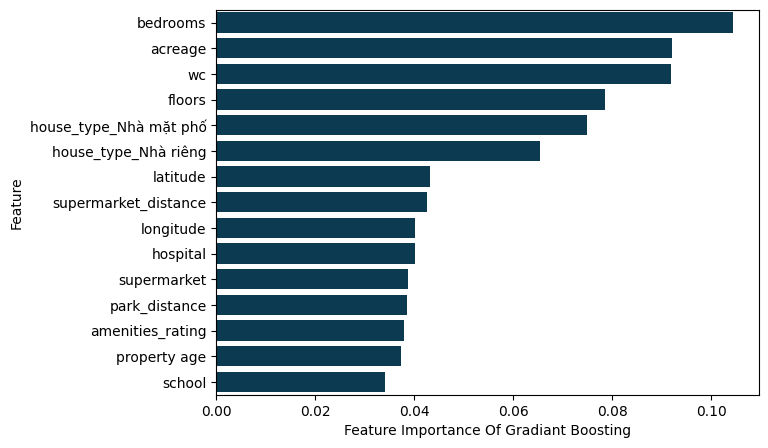

In [97]:
xgb_feature_importances = xgb_model.feature_importances_
xgb_feature_importances = pd.Series(
    xgb_feature_importances, index=X_train.columns.values
    ).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=xgb_feature_importances,
            y=xgb_feature_importances.index,
            color="#003f5c");
plt.xlabel('Feature Importance Of Gradiant Boosting');
plt.ylabel('Feature');

**Random Forest**

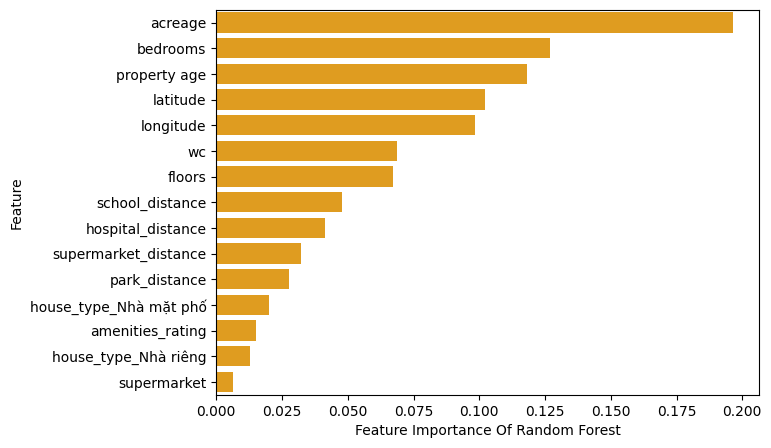

In [98]:
rf_feature_importances = rf_model.feature_importances_
rf_feature_importances = pd.Series(
    rf_feature_importances, index=X_train.columns.values
    ).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=rf_feature_importances,
            y=rf_feature_importances.index,
            color="#ffa600");
plt.xlabel('Feature Importance Of Random Forest');
plt.ylabel('Feature');


# **Conclusion**
Trong đồ án dự đoán giá nhà, nhóm em đã thực hiện tốt các bước thu thập dữ liệu, xử lý dữ liệu, lọc ra những feature tốt có giá trị trong phân tích, nhưng do dữ liệu từ việc trang web khá bất tuật tự nên việc scrap web kiến nhóm tốn nhiều thời gian và công sức. Phần modeling, nhóm đã sử dụng ba model phù hợp với dữ liệu là gradiant boosting, rigde regression, random forest và tìm ra được mô đồ tốt nhất là Gradiant boostingvà các feature quan trọng nhất đối với model , tuy nhiên nhóm vẫn còn hạn chế trong việc giải thích thuật toán và áp dụng vào dữ liệu thực để khai thác thêm thông tin.